In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../data/bankloan.csv')
data.head(30)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3.0,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2.0,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1.0,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [4]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
data = data.dropna()
data.isna().any()
data = data.drop('Loan_ID', axis=1)
data['LoanAmount'] = (data['LoanAmount']*1000).astype(int)
Counter(data['Loan_Status'])

Counter({'Y': 332, 'N': 148})

In [6]:
pre_y = data['Loan_Status']
pre_X = data.drop('Loan_Status', axis=1)
dm_X = pd.get_dummies(pre_X)
dm_X = dm_X.astype(int)
dm_y = pre_y.map(dict(Y=1, N=0))
dm_X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1,4583,1508,128000,360,1,0,1,0,1,1,0,1,0,1,0,0
2,0,3000,0,66000,360,1,0,1,0,1,1,0,0,1,0,0,1
3,0,2583,2358,120000,360,1,0,1,0,1,0,1,1,0,0,0,1
4,0,6000,0,141000,360,1,0,1,1,0,1,0,1,0,0,0,1
5,2,5417,4196,267000,360,1,0,1,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0,71000,360,1,1,0,1,0,1,0,1,0,1,0,0
610,3,4106,0,40000,180,1,0,1,0,1,1,0,1,0,1,0,0
611,1,8072,240,253000,360,1,0,1,0,1,1,0,1,0,0,0,1
612,2,7583,0,187000,360,1,0,1,0,1,1,0,1,0,0,0,1


In [7]:
ohe_columns = dm_X.columns

# Guarda las columnas en un archivo .pkl
import joblib
joblib.dump(ohe_columns, 'allcol.pkl')

['allcol.pkl']

In [8]:
smote = SMOTE(sampling_strategy='minority')
X1, y = smote.fit_resample(dm_X, dm_y)
sc = MinMaxScaler()
X = sc.fit_transform(X1)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, shuffle=True)

In [10]:
classifier = Sequential()
classifier.add(Dense(200, activation='relu', kernel_initializer='random_normal', input_dim=X_test.shape[1]))
classifier.add(Dense(400, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(X_train,y_train, batch_size=20, epochs=50,verbose=0)
eval_model = classifier.evaluate(X_train, y_train)
eval_model

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 120us/step - accuracy: 0.9021 - loss: 0.2389


[0.24215680360794067, 0.9058380126953125]

In [11]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


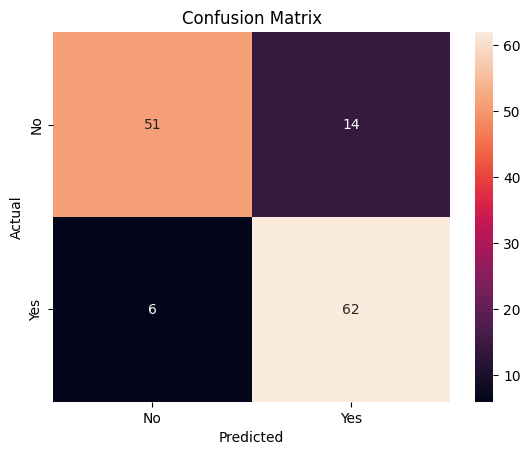

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)

ax.set_xlabel('Predicted');ax.set_ylabel('Actual');
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

In [13]:
"""
import joblib
filename = 'loan_model.pkl'
joblib.dump(classifier, filename)
scaler_filename = 'scaler.pkl'
joblib.dump(sc, scaler_filename) """

"\nimport joblib\nfilename = 'loan_model.pkl'\njoblib.dump(classifier, filename)\nscaler_filename = 'scaler.pkl'\njoblib.dump(sc, scaler_filename) "